In [1]:
from bs4 import BeautifulSoup
import requests
import smtplib #emails a mi
import time
import datetime

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
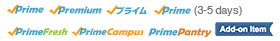

In [4]:
URL='https://www.amazon.com/SunSun-Hw303B-370GPH-Canister-Sterilizer/dp/B00MH2NRIQ/ref=sr_1_7?crid=36TX8E4OZQ52Z&keywords=canister+filter&qid=1681407758&sprefix=canister+filte%2Caps%2C247&sr=8-7'
#https://httpbin.org/get
headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/111.0","Accept-Encoding":"gzip, deflate, br","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8","DNT":"1", "Connection":"close","Upgrade-Insecure-Requests":"1"}

page=requests.get(URL,headers=headers)

#pulls content
soup1=BeautifulSoup(page.content,"html.parser")

#print(soup1)

soup2=BeautifulSoup(soup1.prettify(),"html.parser")
print(soup2)


In [20]:
title=soup2.find(id='productTitle').get_text().strip()#lo saqué de la vista de desarrollador: id=
price=soup2.find(id='apex_offerDisplay_desktop').get_text().split('$')[1].split('\n')[0].strip()
print(title)
print(price)

SunSun Hw303B 370GPH Pro Canister Filter Kit with 9-watt UV Sterilizer
136.99


In [27]:
import datetime
today=datetime.date.today()

In [28]:
import csv
header=['Title','Price','Date']
data=[title,price,today]
#type(data[0])

with open('AmazonWebScrapper.csv','w',newline='',encoding='utf-8') as f:
    writer=csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)
    
    
    
#print(f)

In [29]:
import pandas as pd


                                               Title   Price        Date
0  SunSun Hw303B 370GPH Pro Canister Filter Kit w...  136.99  2023-04-18


In [39]:
k=0
URLs=['https://www.amazon.com/-/es/John-Karlsrud/dp/3319628577']
pages=[requests.get(URLs[k],headers=headers)]

#pulls content
soups=[BeautifulSoup(pages[k].content,"html.parser")]
#print(soups[k])
titles=[soups[k].find(id='productTitle').get_text().strip()]#lo saqué de la vista de desarrollador: id=
prices=[soups[k].find(id='apex_offerDisplay_desktop').get_text().split('$')[1].split('\n')[0].strip()[0:-2]]#0:-2 is for removing US
print(titles[k])
print(prices[k])

datas=[[titles[k],prices[k],today]]
with open('AmazonWebScrapper.csv','a+',newline='',encoding='utf-8') as f:
    writer=csv.writer(f)
    writer.writerow(datas[k])

df=pd.read_csv('AmazonWebScrapper.csv')
print(df)

The UN at War: Peace Operations in a New Era
17.86
                                               Title   Price        Date
0  SunSun Hw303B 370GPH Pro Canister Filter Kit w...  136.99  2023-04-18
1       The UN at War: Peace Operations in a New Era   17.86  2023-04-18


In [ ]:
URLS=['https://www.amazon.com/SunSun-Hw303B-370GPH-Canister-Sterilizer/dp/B00MH2NRIQ/','https://www.amazon.com/-/es/John-Karlsrud/dp/3319628577']#how many products
def check_price(URLS):
    headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/111.0","Accept-Encoding":"gzip, deflate, br","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8","DNT":"1", "Connection":"close","Upgrade-Insecure-Requests":"1"}
    with open('AmazonWebScrapper.csv','a+',newline='',encoding='utf-8') as f:
        writer=csv.writer(f)
        for k in range(len(URLS)):
            pages=requests.get(URLS[k],headers=headers)
            #pulls content
            soups=BeautifulSoup(pages.content,"html.parser")
            #print(soups[k])
            titles=soups.find(id='productTitle').get_text().strip()#lo saqué de la vista de desarrollador: id=
            prices=soups.find(id='apex_offerDisplay_desktop').get_text().split('$')[1].split('\n')[0].strip()[0:-2]#0:-2 is for removing US


            datas=[titles,prices,today]
            writer.writerow(datas)
            if k=1:
                if float(prices)<15:
                    send_mail()


In [ ]:

while(True):
    check_price(URLS)
    time.sleep(86400)

In [ ]:
def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('fhechene@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "El libro está a menos de 15"
    body = "!Compra el libro! Link:https://www.amazon.com/-/es/John-Karlsrud/dp/3319628577"
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'fhechene@gmail.com',
        msg
     
    )